In [141]:
import pandas as pd
import math
import numpy as np
import networkx as nx
from scipy.stats import norm
from scipy import stats
import seaborn as sns

In [142]:
df = pd.read_csv('PREZZI.csv', sep=',').transpose()

In [143]:
print(df.shape)


(184, 743)


In [144]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,733,734,735,736,737,738,739,740,741,742
A2A,1.3045,1.331,1.3175,1.340,1.340,1.3375,1.3315,1.305,1.335,1.328,...,1.730,1.7535,1.7465,1.7575,1.771,1.7970,1.7925,1.7915,1.7895,1.7865
ABITARE IN,4.8100,4.830,4.7100,4.860,4.860,4.8300,4.8600,4.900,4.920,4.910,...,5.180,5.1800,5.1400,5.0400,5.000,5.0600,5.0800,5.1800,5.0600,5.0000
ACEA,17.1500,17.180,17.0100,17.310,17.070,17.2200,17.2500,17.240,17.360,17.390,...,11.100,11.0000,11.0000,11.2700,11.370,11.5900,11.6700,11.8500,11.6100,11.4500
AEFFE,1.1040,1.086,1.0700,1.118,1.152,1.1640,1.1220,1.102,1.110,1.112,...,0.734,0.7310,0.7330,0.7440,0.745,0.7420,0.8000,0.8050,0.8140,0.8190
AEROP GUGL MARCO,8.4800,8.360,8.5200,8.520,8.460,8.3400,8.5000,8.500,8.240,8.380,...,8.060,8.0200,8.1000,8.1200,8.100,8.1400,8.1200,8.1200,8.0800,8.0200
ALERION CLEAN POWER,10.6000,12.850,15.0000,14.900,14.950,14.6500,13.7000,13.800,13.600,12.950,...,23.300,22.4500,22.7000,22.8500,23.350,23.2000,23.7000,23.9000,23.4000,23.6000
ALGOWATT,0.3420,0.341,0.3400,0.344,0.338,0.3430,0.3440,0.340,0.340,0.337,...,0.330,0.3200,0.3130,0.3130,0.313,0.3155,0.3205,0.3200,0.3150,0.3130
ALKEMY,7.0800,7.040,6.9200,6.900,6.840,7.1000,7.0000,7.000,6.940,6.880,...,7.260,7.1400,6.9500,6.8000,7.000,7.1000,7.2200,7.3100,7.2200,7.3700
AMPLIFON,34.0400,33.940,33.5600,33.020,32.680,33.8400,33.6800,33.620,33.910,34.160,...,27.290,26.8400,25.7600,25.3800,26.640,26.5000,27.5300,27.7000,27.7600,27.6400
ANIMA HOLDING,3.8820,3.926,3.9040,4.034,4.080,4.1140,4.1600,4.220,4.142,4.092,...,3.816,3.8320,3.8400,3.8280,3.856,3.8060,3.8640,4.0700,3.8880,3.9140


In [145]:
#The date is not informative for us

#df.drop('Name', axis=0, inplace=True)

In [146]:
#Create a column Daily_price that contains the list of prices for each stock

df["Daily_price"] = df.apply(lambda row: row.tolist(), axis=1)

In [147]:
#Define the logarithm of return

def Returns(prices):
  log_returns = []
  for i in range(1,len(prices)):
    log_returns.append(np.log(prices[i]/prices[i-1]))

  return log_returns

In [148]:
#Create a column Log_return that contains the list of returns for each stock

df['Log_return'] = df['Daily_price'].apply(Returns)

In [149]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,735,736,737,738,739,740,741,742,Daily_price,Log_return
A2A,1.3045,1.331,1.3175,1.340,1.340,1.3375,1.3315,1.305,1.335,1.328,...,1.7465,1.7575,1.771,1.7970,1.7925,1.7915,1.7895,1.7865,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328557, -0.010194537979594277, ..."
ABITARE IN,4.8100,4.830,4.7100,4.860,4.860,4.8300,4.8600,4.900,4.920,4.910,...,5.1400,5.0400,5.000,5.0600,5.0800,5.1800,5.0600,5.0000,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.9...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,17.1500,17.180,17.0100,17.310,17.070,17.2200,17.2500,17.240,17.360,17.390,...,11.0000,11.2700,11.370,11.5900,11.6700,11.8500,11.6100,11.4500,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,1.1040,1.086,1.0700,1.118,1.152,1.1640,1.1220,1.102,1.110,1.112,...,0.7330,0.7440,0.745,0.7420,0.8000,0.8050,0.8140,0.8190,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,8.4800,8.360,8.5200,8.520,8.460,8.3400,8.5000,8.500,8.240,8.380,...,8.1000,8.1200,8.100,8.1400,8.1200,8.1200,8.0800,8.0200,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.5, 8.5,...","[-0.014252022707201615, 0.018957913744614207, ..."
ALERION CLEAN POWER,10.6000,12.850,15.0000,14.900,14.950,14.6500,13.7000,13.800,13.600,12.950,...,22.7000,22.8500,23.350,23.2000,23.7000,23.9000,23.4000,23.6000,"[10.6, 12.85, 15.0, 14.9, 14.95, 14.65, 13.7, ...","[0.19248981022320735, 0.15470638976098133, -0...."
ALGOWATT,0.3420,0.341,0.3400,0.344,0.338,0.3430,0.3440,0.340,0.340,0.337,...,0.3130,0.3130,0.313,0.3155,0.3205,0.3200,0.3150,0.3130,"[0.342, 0.341, 0.34, 0.344, 0.338, 0.343, 0.34...","[-0.002928259779088334, -0.0029368596733097135..."
ALKEMY,7.0800,7.040,6.9200,6.900,6.840,7.1000,7.0000,7.000,6.940,6.880,...,6.9500,6.8000,7.000,7.1000,7.2200,7.3100,7.2200,7.3700,"[7.08, 7.04, 6.92, 6.9, 6.84, 7.1, 7.0, 7.0, 6...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,34.0400,33.940,33.5600,33.020,32.680,33.8400,33.6800,33.620,33.910,34.160,...,25.7600,25.3800,26.640,26.5000,27.5300,27.7000,27.7600,27.6400,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,3.8820,3.926,3.9040,4.034,4.080,4.1140,4.1600,4.220,4.142,4.092,...,3.8400,3.8280,3.856,3.8060,3.8640,4.0700,3.8880,3.9140,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


In [150]:
#We don't need more all these columns

df.drop(columns=[i for i in range(0,743)],inplace=True)

In [151]:
#Now the Dataframe looks...

df.head(10)

,Daily_price,Log_return
A2A,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328557, -0.010194537979594277, ..."
ABITARE IN,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.9...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.5, 8.5,...","[-0.014252022707201615, 0.018957913744614207, ..."
ALERION CLEAN POWER,"[10.6, 12.85, 15.0, 14.9, 14.95, 14.65, 13.7, ...","[0.19248981022320735, 0.15470638976098133, -0...."
ALGOWATT,"[0.342, 0.341, 0.34, 0.344, 0.338, 0.343, 0.34...","[-0.002928259779088334, -0.0029368596733097135..."
ALKEMY,"[7.08, 7.04, 6.92, 6.9, 6.84, 7.1, 7.0, 7.0, 6...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


In [152]:

log_return_flattened = []
for i in range(df.shape[0]):
    element = df.iloc[i,1]
    log_return_flattened.append(element)
log_return_flattened = log_return_flattened[0]



<Axes: ylabel='Frequency'>

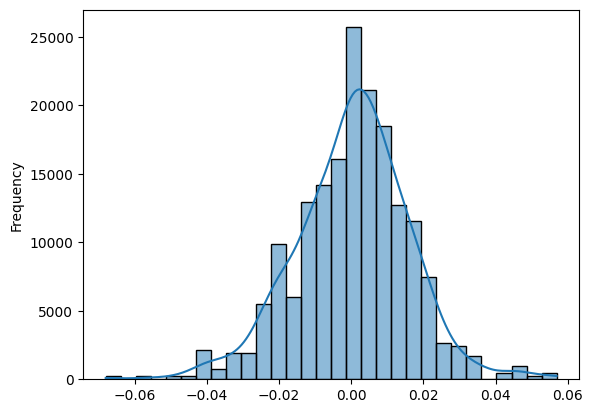

In [153]:
sns.histplot(log_return_flattened, kde=True, stat='frequency')
    

mu : 0.00042377166157234663, std : 0.01580530247533797
-0.1761677880747454 1.116845204332905


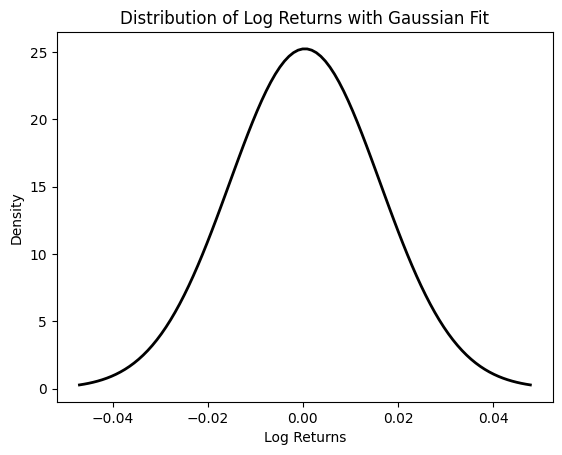

In [154]:
import matplotlib.pyplot as plt

mu, std = norm.fit(log_return_flattened)
xmin, xmax = plt.xlim()
x = np.linspace(mu - 3 * std, mu + 3 * std, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribution of Log Returns with Gaussian Fit")
plt.xlabel("Log Returns")
plt.ylabel("Density")
print(f"mu : {mu}, std : {std}")

skewness = stats.skew(log_return_flattened)
kurtosis = stats.kurtosis(log_return_flattened)
print(skewness, kurtosis)

In [155]:
#Define the Pearson correlation coefficient
from scipy.stats import pearsonr
def correlation_coefficient(lista1, lista2):
    #return np.corrcoef(lista1, lista2)[0, 1]
    correlation, p_value = pearsonr(lista1, lista2)
    return correlation

def correlation_in_windows(series1, series2, window_size):
    num_windows = len(series1) // window_size
    correlations = []

    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size

        window1 = series1[start_idx:end_idx]
        window2 = series2[start_idx:end_idx]

        correlation = np.corrcoef(window1, window2)[0, 1]
        correlations.append(correlation)

    return np.sum(correlations)/len(correlations)

In [156]:
from itertools import combinations
from tqdm import tqdm

#Generate all the combinations of couples of Log_return
couples = list(combinations(df['Log_return'], 2))

#Create a column Correlation_coefficients which is a list of dictionaries
df['Correlation_coefficients'] = [{} for _ in range(len(df))]

#Compute the correlation coefficient for each couple and store the value in the dictionary
for list1, list2 in tqdm(couples):
    #coeff = correlation_coefficient(list1, list2)
    coeff = correlation_coefficient(list1, list2)
    idx_list1 = df.index[df['Log_return'].apply(lambda x: np.array_equal(x, list1))].tolist()[0]
    idx_list2 = df.index[df['Log_return'].apply(lambda x: np.array_equal(x, list2))].tolist()[0]
    df.at[idx_list1, 'Correlation_coefficients'][f'{idx_list2}'] = coeff
    df.at[idx_list2, 'Correlation_coefficients'][f'{idx_list1}'] = coeff

  0%|          | 0/16836 [00:00<?, ?it/s]

100%|██████████| 16836/16836 [12:18<00:00, 22.79it/s]


In [157]:
#Each row of Correlation_coefficients looks...

print(df.iloc[0]['Correlation_coefficients'])

{'ABITARE IN': 0.17931521989991742, 'ACEA': 0.6371146784789242, 'AEFFE': 0.3195558485617619, 'AEROP GUGL MARCO': 0.18099986259274203, 'ALERION CLEAN POWER': 0.2936832575895856, 'ALGOWATT': 0.15366841331256417, 'ALKEMY': 0.21744371808646792, 'AMPLIFON': 0.3414995215435041, 'ANIMA HOLDING': 0.44860973025030026, 'ANTARES VISION': 0.10633672010151157, 'AQUAFIL': 0.25659956488254504, 'ASCOPIAVE': 0.4690599378075542, 'AUTOSTRADE MERIDIONALI': 0.14113097918427947, 'AVIO': 0.14261601182926176, 'AZIMUT HOLDING': 0.5077062790211568, 'BANCA GENERALI': 0.44709746088133495, 'BANCA IFIS': 0.4077686518847171, 'BANCA MEDIOLANUM': 0.4688681994774779, 'BANCA MONTE DEI PASCHI': 0.11996145350471427, 'BANCA SISTEMA': 0.31538764192768864, 'BANCO BPM': 0.36038299314104966, 'BASICNET': 0.16316829144338166, 'BASTOGI': 0.04798793764649586, 'BANCA PPO.DI SONDRIO': 0.35627657904465876, 'BANCA PROFILO': 0.24729117267773418, 'BEEWIZE': 0.0830664403756373, 'BEGHELLI': 0.08922545496326714, 'BFF BANK': 0.2686442946820

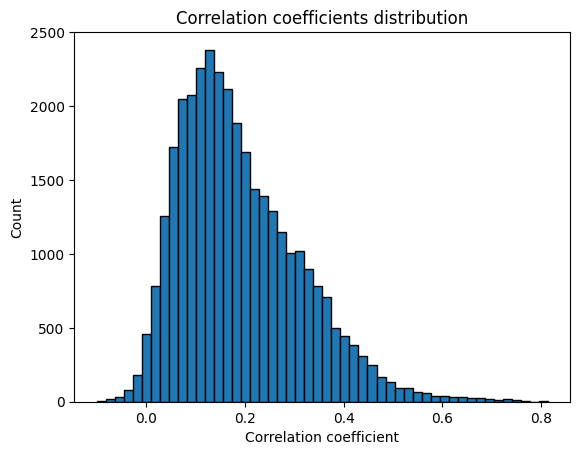

In [158]:
import matplotlib.pyplot as plt

#Extract the correlation coefficients
coefficients = df['Correlation_coefficients'].apply(lambda x: list(x.values())).sum()

#Plot the distribution of correlation coefficients
plt.hist(coefficients, bins=50, edgecolor='black')
plt.xlabel('Correlation coefficient')
plt.ylabel('Count')
plt.title('Correlation coefficients distribution')
plt.show()


In [161]:
l = []
for i in range(df.shape[0]):
    l.append(list(df.iloc[i]['Correlation_coefficients'].values()))
flat_l = [item for sublist in l for item in sublist]

sorted_coefficient = sorted(flat_l)
n = len(sorted_coefficient)


decili = [sorted_coefficient[int((n/10)*i)] for i in range(1, 10)]
print(decili)



[0.05267076721424905, 0.08404709767555305, 0.11301578662035977, 0.13869351835562693, 0.16708612164614975, 0.19877679692766706, 0.24072672091595854, 0.29165233999411266, 0.3591605359437259]


In [173]:
#Choose a threshold for the correlation coefficient


up_cc_threshold = decili[1]
low_cc_threshold = decili[0]

#low_cc_threshold = decili[1]
#up_cc_threshold = decili[9]

In [174]:
G = nx.Graph()

for node in df.index:
    G.add_node(node)

index = 0
for node in df.index:
  for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
    if  weight <= low_cc_threshold : #and weight <= up_cc_threshold :
      G.add_edge(node, connected_node, weight=weight)
  index += 1

In [175]:
MST = nx.minimum_spanning_tree(G)

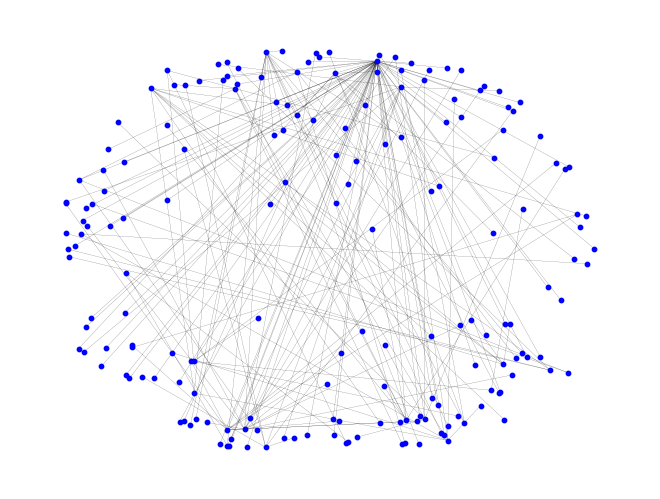

In [176]:
nx.draw(MST, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()

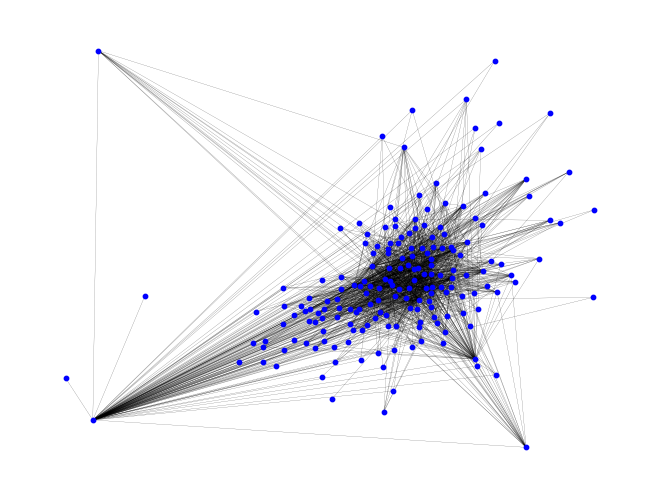

In [177]:
import matplotlib.pyplot as plt

#Network visualization
nx.draw(G, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()

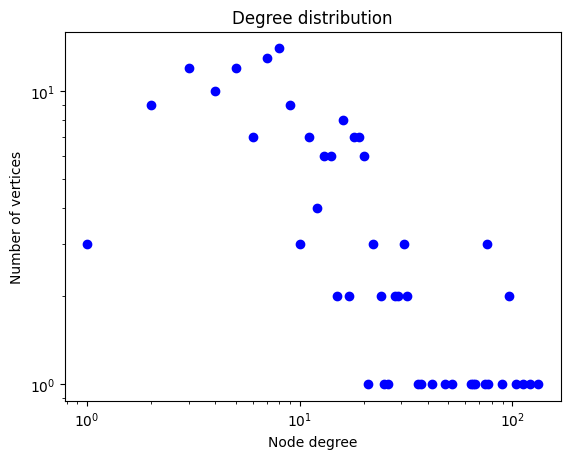

In [178]:
#Degree distribution

counts = nx.degree_histogram(G)
degrees = [i for i in range(len(counts))]

plt.scatter(degrees, counts, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node degree')
plt.ylabel('Number of vertices')
plt.title('Degree distribution')
plt.show()


In [179]:
#The density of the graph

density = nx.density(G)
print(density)

0.10002375861249703


In [180]:
#How many nodes with degree different from zero there are

nodes_with_nozero_degree = []

for node, deg in nx.degree(G):
  if deg != 0:
    nodes_with_nozero_degree.append(node)

print(len(nodes_with_nozero_degree))

184


In [181]:
indset = nx.approximation.maximum_independent_set(G)
print(len(indset))

124


In [182]:
#CLIQUES
clique = nx.approximation.max_clique(G)
print(len(clique))

7


In [172]:
nx.approximation.average_clustering(G, trials=100000, seed=10)

0.74328

In [ ]:
# Write